In [ ]:
## Imports
import pandas as pd
import joblib

## Load Dataset and Model
players_df_full = pd.read_csv("data/players_21.csv")
model = joblib.load("model/fifa_value_model.pkl")

In [ ]:
## Select Relevant Features and Columns
features = ['age', 'height_cm', 'weight_kg', 'pace', 'shooting', 'passing',
            'dribbling', 'defending', 'physic']
columns = ['short_name'] + features + ['value_eur']

players_df_full = players_df_full[columns]
players_df_full_listed = players_df_full[players_df_full['value_eur'] > 0]
players_df_full_listed = players_df_full_listed.dropna(subset=features)

In [ ]:
## Predict Market Values and Identify Undervalued Players

X_listed = players_df_full_listed[features]
players_df_full_listed['predicted_value'] = model.predict(X_listed)

players_df_full_listed['value_gap'] = players_df_full_listed['predicted_value'] - players_df_full_listed['value_eur']

undervalued_players_df  = players_df_full_listed.sort_values(by='value_gap', ascending=False)

C:\Users\veskovicm\AppData\Local\Temp\ipykernel_6292\1646859528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['value_gap_millions'] = top10['value_gap'] / 1e6


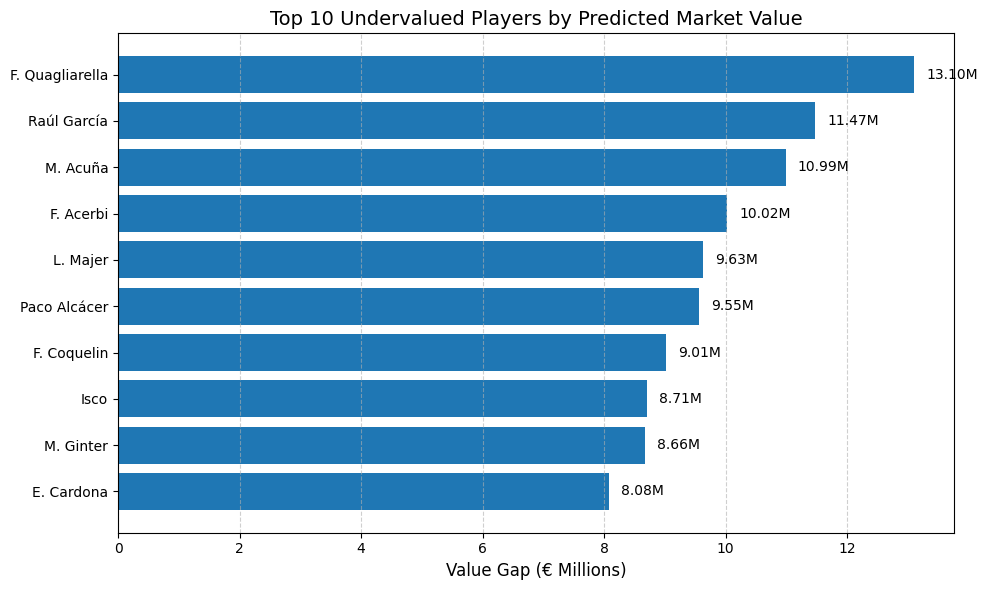

In [24]:
## Plot Top 10 Undervalued Players 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

top10 = undervalued_players_df.head(10)
top10['value_gap_millions'] = top10['value_gap'] / 1e6

plt.figure(figsize=(10, 6))
bars = plt.barh(top10['short_name'], top10['value_gap_millions'], color="#1f77b4")

plt.xlabel("Value Gap (€ Millions)", fontsize=12)
plt.title("Top 10 Undervalued Players by Predicted Market Value", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}M", va='center', fontsize=10)

plt.savefig("figures/top10_undervalued_chart.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
